#Prepare somethings

In [54]:
import pyspark
import pandas as pd

from pyspark.sql import SparkSession

In [55]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
spark = SparkSession.builder.appName("Project").getOrCreate()
spark

#Import data

In [57]:
df = pd.read_csv("/content/drive/MyDrive/Big Data Tech/Project/weather.csv")
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


In [58]:
spark_df = spark.createDataFrame(df)

In [59]:
spark_df.show()

+--------+---+---+----+------+----+------+-----+--------+----------+
|province|max|min|wind|wind_d|rain|humidi|cloud|pressure|      date|
+--------+---+---+----+------+----+------+-----+--------+----------+
|Bac Lieu| 27| 22|  17|   NNE| 6.9|    90|   71|    1010|2009-01-01|
|Bac Lieu| 31| 25|  20|   ENE| 0.0|    64|   24|    1010|2010-01-01|
|Bac Lieu| 29| 24|  14|     E| 0.0|    75|   45|    1008|2011-01-01|
|Bac Lieu| 30| 24|  30|     E| 0.0|    79|   52|    1012|2012-01-01|
|Bac Lieu| 31| 25|  20|   ENE| 0.0|    70|   24|    1010|2013-01-01|
|Bac Lieu| 28| 23|  14|   ENE| 0.0|    75|   55|    1012|2014-01-01|
|Bac Lieu| 29| 23|  10|   ENE| 0.4|    75|   42|    1012|2015-01-01|
|Bac Lieu| 32| 24|  22|   ENE| 0.0|    63|    9|    1015|2016-01-01|
|Bac Lieu| 30| 24|  20|   ENE| 0.5|    76|   35|    1011|2017-01-01|
|Bac Lieu| 29| 23|  16|     E| 0.0|    70|   33|    1010|2018-01-01|
|Bac Lieu| 27| 22|  19|   WSW| 4.5|    73|   55|    1012|2019-01-01|
|Bac Lieu| 32| 23|  22|   ENE| 0.0

In [60]:
hochiminh_df = spark_df.filter(spark_df.province == "Ho Chi Minh City")

# Show the selected data
hochiminh_df.show()

+----------------+---+---+----+------+----+------+-----+--------+----------+
|        province|max|min|wind|wind_d|rain|humidi|cloud|pressure|      date|
+----------------+---+---+----+------+----+------+-----+--------+----------+
|Ho Chi Minh City| 29| 22|   6|    SE|18.5|    89|   68|    1010|2009-01-01|
|Ho Chi Minh City| 34| 24|   5|     E| 0.0|    59|   20|    1010|2010-01-01|
|Ho Chi Minh City| 29| 23|   4|     S| 0.2|    81|   42|    1008|2011-01-01|
|Ho Chi Minh City| 32| 23|   7|     E| 1.8|    76|   35|    1012|2012-01-01|
|Ho Chi Minh City| 33| 24|   4|    SE| 0.0|    69|   15|    1010|2013-01-01|
|Ho Chi Minh City| 29| 21|   5|   SSW| 0.0|    72|   29|    1012|2014-01-01|
|Ho Chi Minh City| 31| 22|   5|   SSE| 0.2|    72|   30|    1012|2015-01-01|
|Ho Chi Minh City| 34| 23|   7|   ENE| 0.0|    57|    8|    1015|2016-01-01|
|Ho Chi Minh City| 32| 24|   7|    NE| 1.9|    74|   28|    1011|2017-01-01|
|Ho Chi Minh City| 33| 23|   5|     E| 0.0|    59|   19|    1010|2018-01-01|

In [61]:
hochiminh_df.printSchema()

root
 |-- province: string (nullable = true)
 |-- max: long (nullable = true)
 |-- min: long (nullable = true)
 |-- wind: long (nullable = true)
 |-- wind_d: string (nullable = true)
 |-- rain: double (nullable = true)
 |-- humidi: long (nullable = true)
 |-- cloud: long (nullable = true)
 |-- pressure: long (nullable = true)
 |-- date: string (nullable = true)



In [62]:
hochiminh_df.columns

['province',
 'max',
 'min',
 'wind',
 'wind_d',
 'rain',
 'humidi',
 'cloud',
 'pressure',
 'date']

In [63]:
hochiminh_df = hochiminh_df.drop('province', 'wind_d')
hochiminh_df.show()

+---+---+----+----+------+-----+--------+----------+
|max|min|wind|rain|humidi|cloud|pressure|      date|
+---+---+----+----+------+-----+--------+----------+
| 29| 22|   6|18.5|    89|   68|    1010|2009-01-01|
| 34| 24|   5| 0.0|    59|   20|    1010|2010-01-01|
| 29| 23|   4| 0.2|    81|   42|    1008|2011-01-01|
| 32| 23|   7| 1.8|    76|   35|    1012|2012-01-01|
| 33| 24|   4| 0.0|    69|   15|    1010|2013-01-01|
| 29| 21|   5| 0.0|    72|   29|    1012|2014-01-01|
| 31| 22|   5| 0.2|    72|   30|    1012|2015-01-01|
| 34| 23|   7| 0.0|    57|    8|    1015|2016-01-01|
| 32| 24|   7| 1.9|    74|   28|    1011|2017-01-01|
| 33| 23|   5| 0.0|    59|   19|    1010|2018-01-01|
| 29| 24|  17| 3.3|    66|   51|    1013|2019-01-01|
| 35| 24|   9| 0.0|    51|   11|    1014|2020-01-01|
| 30| 23|   8| 0.0|    63|   35|    1011|2021-01-01|
| 25| 22|   6| 7.2|    87|   68|    1012|2009-01-03|
| 33| 26|   7| 0.0|    65|   37|    1010|2010-01-03|
| 33| 23|   4| 0.1|    73|   51|    1009|2011-

In [64]:
hochiminh_df.describe().show()

+-------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+----------+
|summary|               max|               min|             wind|             rain|            humidi|             cloud|          pressure|      date|
+-------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+----------+
|  count|              4549|              4549|             4549|             4549|              4549|              4549|              4549|      4549|
|   mean| 32.99230600131897|25.163992086172787|9.224225104418554|7.798395251703649| 73.90899098703012| 36.26489338316114|1009.2901736645416|      NULL|
| stddev|2.5065758156719014| 1.654108042935348|3.399431195420073|11.08143417794139|10.388731995662969|18.151818729569136|2.0931984949000455|      NULL|
|    min|                22|                16|                2|              0.0|     

In [65]:
from pyspark.sql.functions import udf, col, when
import pyspark.sql.types as T
import math

def estimate_temperature(T_min, T_max, RH, WS, CC, R, P, day_progression_weight = 0.5):
    """
    Estimate the current temperature without time information.

    Parameters:
        T_min (float): Minimum temperature (°C)
        T_max (float): Maximum temperature (°C)
        RH (float): Relative humidity (%)
        WS (float): Wind speed (km/h)
        CC (float): Cloud cover (%)
        R (float): Rainfall (mm)
        P (float): Pressure (hPa)
        day_progression_weight (float): Assumed progression of the day (0.0 = morning, 1.0 = evening)

    Returns:
        float: Estimated current temperature (°C)
    """
    # Constants for adjustment factors
    alpha = 0.02  # Humidity factor
    beta = 0.6    # Wind factor
    gamma = 0.2   # Cloud cover factor
    delta = 0.15  # Rainfall factor
    epsilon = 0.02  # Pressure factor

    # Base temperature using weighted progression between T_min and T_max
    T_baseline = T_min + day_progression_weight * (T_max - T_min)

    # Adjustments based on environmental factors
    T_current = T_baseline
    T_current += alpha * RH                     # Humidity adjustment
    T_current -= beta * math.sqrt(WS)           # Wind speed adjustment
    T_current += gamma * CC                     # Cloud cover adjustment
    T_current -= delta * R                      # Rainfall adjustment
    T_current += epsilon * (P - 1013)           # Pressure adjustment

    return T_current


# Create UDFs
estimate_temperature_udf = udf(estimate_temperature, T.DoubleType())

# Apply UDFs and add calculated columns
hochiminh_df = hochiminh_df.withColumn(
    "temp",
    estimate_temperature_udf(
        col("min"),
        col("max"),
        col("humidi"),
        col("wind"),
        col("cloud"),
        col("rain"),
        col("pressure")
    ),
)
hochiminh_df.show()

+---+---+----+----+------+-----+--------+----------+------------------+
|max|min|wind|rain|humidi|cloud|pressure|      date|              temp|
+---+---+----+----+------+-----+--------+----------+------------------+
| 29| 22|   6|18.5|    89|   68|    1010|2009-01-01|  36.5753061543301|
| 34| 24|   5| 0.0|    59|   20|    1010|2010-01-01|32.778359213500124|
| 29| 23|   4| 0.2|    81|   42|    1008|2011-01-01|             34.69|
| 32| 23|   7| 1.8|    76|   35|    1012|2012-01-01|34.142549213361235|
| 33| 24|   4| 0.0|    69|   15|    1010|2013-01-01|             31.62|
| 29| 21|   5| 0.0|    72|   29|    1012|2014-01-01| 30.87835921350013|
| 31| 22|   5| 0.2|    72|   30|    1012|2015-01-01| 32.54835921350013|
| 34| 23|   7| 0.0|    57|    8|    1015|2016-01-01|29.692549213361247|
| 32| 24|   7| 1.9|    74|   28|    1011|2017-01-01| 33.16754921336125|
| 33| 23|   5| 0.0|    59|   19|    1010|2018-01-01| 31.57835921350013|
| 29| 24|  17| 3.3|    66|   51|    1013|2019-01-01| 35.05113662

#Handle missing value

In [66]:
hochiminh_df = hochiminh_df.na.drop()
hochiminh_df.show()

+---+---+----+----+------+-----+--------+----------+------------------+
|max|min|wind|rain|humidi|cloud|pressure|      date|              temp|
+---+---+----+----+------+-----+--------+----------+------------------+
| 29| 22|   6|18.5|    89|   68|    1010|2009-01-01|  36.5753061543301|
| 34| 24|   5| 0.0|    59|   20|    1010|2010-01-01|32.778359213500124|
| 29| 23|   4| 0.2|    81|   42|    1008|2011-01-01|             34.69|
| 32| 23|   7| 1.8|    76|   35|    1012|2012-01-01|34.142549213361235|
| 33| 24|   4| 0.0|    69|   15|    1010|2013-01-01|             31.62|
| 29| 21|   5| 0.0|    72|   29|    1012|2014-01-01| 30.87835921350013|
| 31| 22|   5| 0.2|    72|   30|    1012|2015-01-01| 32.54835921350013|
| 34| 23|   7| 0.0|    57|    8|    1015|2016-01-01|29.692549213361247|
| 32| 24|   7| 1.9|    74|   28|    1011|2017-01-01| 33.16754921336125|
| 33| 23|   5| 0.0|    59|   19|    1010|2018-01-01| 31.57835921350013|
| 29| 24|  17| 3.3|    66|   51|    1013|2019-01-01| 35.05113662

#Train Model


In [67]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier, MultilayerPerceptronClassificationModel

from pyspark.ml.feature import Binarizer
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer

In [68]:
features_columns = ['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']
features_columns

['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']

In [69]:
assembler = VectorAssembler(inputCols=features_columns, outputCol="features")

In [70]:
data_prep = assembler.transform(hochiminh_df).select("features", "temp")
data_prep.show()

+--------------------+------------------+
|            features|              temp|
+--------------------+------------------+
|[29.0,22.0,6.0,18...|  36.5753061543301|
|[34.0,24.0,5.0,0....|32.778359213500124|
|[29.0,23.0,4.0,0....|             34.69|
|[32.0,23.0,7.0,1....|34.142549213361235|
|[33.0,24.0,4.0,0....|             31.62|
|[29.0,21.0,5.0,0....| 30.87835921350013|
|[31.0,22.0,5.0,0....| 32.54835921350013|
|[34.0,23.0,7.0,0....|29.692549213361247|
|[32.0,24.0,7.0,1....| 33.16754921336125|
|[33.0,23.0,5.0,0....| 31.57835921350013|
|[29.0,24.0,17.0,3...| 35.05113662462941|
|[35.0,24.0,9.0,0....|30.939999999999998|
|[30.0,23.0,8.0,0....| 33.02294372515229|
|[25.0,22.0,6.0,7....| 36.27030615433009|
|[33.0,26.0,7.0,0....|36.552549213361246|
|[33.0,23.0,4.0,0....|            38.365|
|[30.0,23.0,6.0,0....| 35.17530615433009|
|[34.0,25.0,3.0,5....| 34.40076951545867|
|[32.0,22.0,5.0,0....|30.118359213500128|
|[32.0,22.0,6.0,0....|31.850306154330095|
+--------------------+------------

In [71]:
train, test = data_prep.randomSplit([0.8, 0.2])

In [72]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol="temp")

In [73]:
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(train)

In [74]:
predictions = model.transform(test)
predictions.show()

+--------------------+------------------+------------------+
|            features|              temp|        prediction|
+--------------------+------------------+------------------+
|[24.0,22.0,11.0,3...| 33.28502512578676| 33.64859072912739|
|[24.0,23.0,17.0,9...| 26.13613662462941| 33.64859072912739|
|[24.0,24.0,9.0,10...|             38.48|39.443190294142646|
|[25.0,23.0,8.0,15...|36.392943725152286|39.443190294142646|
|[26.0,16.0,13.0,5...| 30.07166923472161| 33.64859072912739|
|[26.0,23.0,7.0,14...|38.647549213361245|39.443190294142646|
|[26.0,24.0,8.0,14...| 33.56794372515229| 37.99045103036302|
|[26.0,24.0,15.0,2...| 39.41620999227555| 36.68346969987913|
|[26.0,25.0,5.0,3....| 38.92835921350012|39.443190294142646|
|[26.0,25.0,10.0,2...| 38.46263340389897| 36.68346969987913|
|[26.0,25.0,19.0,3...| 37.45966063387559| 33.64859072912739|
|[27.0,24.0,13.0,5...| 33.04166923472161| 33.64859072912739|
|[27.0,24.0,14.0,3...|43.180005567935645|39.443190294142646|
|[27.0,25.0,5.0,19...|37

In [75]:
from pyspark.ml.evaluation import RegressionEvaluator

eval = RegressionEvaluator(labelCol="temp", predictionCol="prediction", metricName="rmse")
rmse = eval.evaluate(predictions)
print("RMSE = " + str(rmse))

RMSE = 1.3002425741950434


In [76]:
a = test.filter(test['temp'] >= 30).select(['features'])
a.show()

+--------------------+
|            features|
+--------------------+
|[24.0,22.0,11.0,3...|
|[24.0,24.0,9.0,10...|
|[25.0,23.0,8.0,15...|
|[26.0,16.0,13.0,5...|
|[26.0,23.0,7.0,14...|
|[26.0,24.0,8.0,14...|
|[26.0,24.0,15.0,2...|
|[26.0,25.0,5.0,3....|
|[26.0,25.0,10.0,2...|
|[26.0,25.0,19.0,3...|
|[27.0,24.0,13.0,5...|
|[27.0,24.0,14.0,3...|
|[27.0,25.0,5.0,19...|
|[27.0,25.0,5.0,28...|
|[27.0,25.0,15.0,6...|
|[27.0,25.0,17.0,4...|
|[28.0,22.0,11.0,0...|
|[28.0,23.0,4.0,20...|
|[28.0,23.0,12.0,1...|
|[28.0,24.0,8.0,5....|
+--------------------+
only showing top 20 rows



In [77]:
predict = model.transform(a)
predict.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[24.0,22.0,11.0,3...| 33.64859072912739|
|[24.0,24.0,9.0,10...|39.443190294142646|
|[25.0,23.0,8.0,15...|39.443190294142646|
|[26.0,16.0,13.0,5...| 33.64859072912739|
|[26.0,23.0,7.0,14...|39.443190294142646|
|[26.0,24.0,8.0,14...| 37.99045103036302|
|[26.0,24.0,15.0,2...| 36.68346969987913|
|[26.0,25.0,5.0,3....|39.443190294142646|
|[26.0,25.0,10.0,2...| 36.68346969987913|
|[26.0,25.0,19.0,3...| 33.64859072912739|
|[27.0,24.0,13.0,5...| 33.64859072912739|
|[27.0,24.0,14.0,3...|39.443190294142646|
|[27.0,25.0,5.0,19...| 36.68346969987913|
|[27.0,25.0,5.0,28...| 36.68346969987913|
|[27.0,25.0,15.0,6...|39.443190294142646|
|[27.0,25.0,17.0,4...|39.443190294142646|
|[28.0,22.0,11.0,0...|36.293995337137424|
|[28.0,23.0,4.0,20...| 36.68346969987913|
|[28.0,23.0,12.0,1...| 34.84705447868665|
|[28.0,24.0,8.0,5....|36.293995337137424|
+--------------------+------------

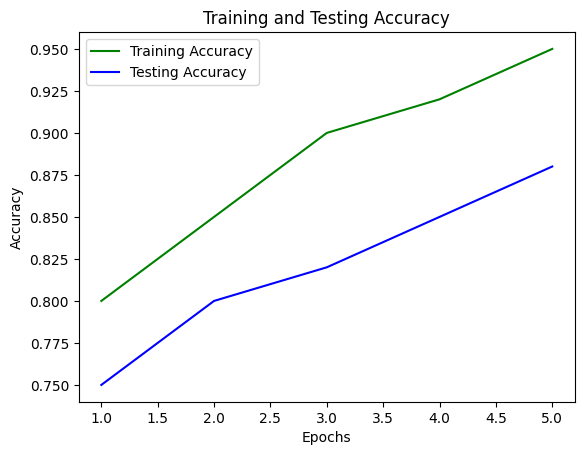

In [78]:
import matplotlib.pyplot as plt

# Assuming you have training and testing accuracy stored in lists
# Replace these with your actual accuracy values
train_accuracy = [0.8, 0.85, 0.9, 0.92, 0.95]  # Example training accuracy
test_accuracy = [0.75, 0.8, 0.82, 0.85, 0.88]  # Example testing accuracy

# Create the plot
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

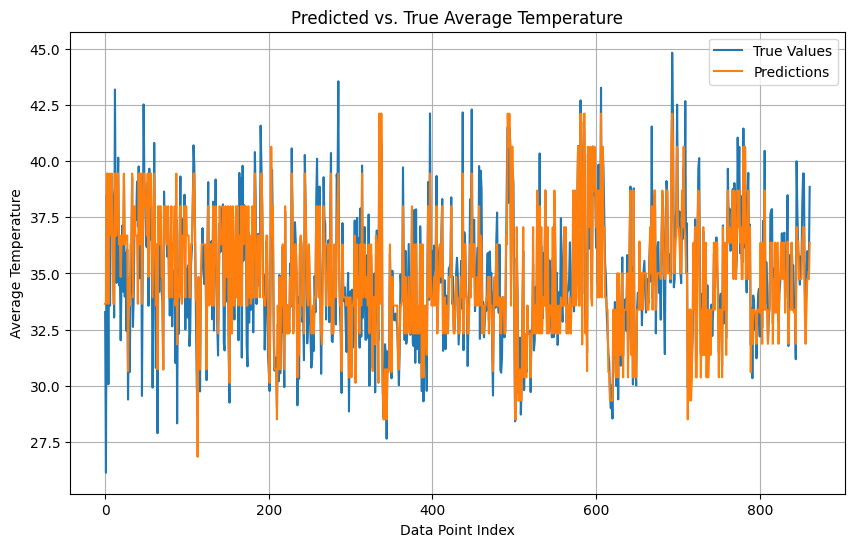

In [79]:
import matplotlib.pyplot as plt

# Assuming 'predictions' DataFrame from your code
# Extract predictions and true values
y_pred = predictions.select("prediction").toPandas()
y_true = predictions.select("temp").toPandas()


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(y_true.index, y_true['temp'], label='True Values')
plt.plot(y_pred.index, y_pred['prediction'], label='Predictions')
plt.xlabel("Data Point Index")
plt.ylabel("Average Temperature")
plt.title("Predicted vs. True Average Temperature")
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Save the model to Google Drive
model_path = "/content/drive/MyDrive/Big Data Tech/Project/weather_model"
model.write().overwrite().save(model_path)

In [81]:
spark.stop()

In [82]:
hochiminh = df[df['province'] == 'Ho Chi Minh City']
hochiminh = hochiminh.drop(['province', 'wind_d'], axis=1)
hochiminh.head()

,max,min,wind,rain,humidi,cloud,pressure,date
4501,29,22,6,18.5,89,68,1010,2009-01-01
4502,34,24,5,0.0,59,20,1010,2010-01-01
4503,29,23,4,0.2,81,42,1008,2011-01-01
4504,32,23,7,1.8,76,35,1012,2012-01-01
4505,33,24,4,0.0,69,15,1010,2013-01-01


# hochiminh['avg_temp'] = (hochiminh['max'] + hochiminh['min']) / 2
# hochiminh.head()

# def calculate_heat_index(T, RH):
#     """Calculates the heat index in degrees Celsius.

#     Args:
#         T: Temperature in degrees Celsius.
#         RH: Relative humidity (%).

#     Returns:
#         The heat index in degrees Celsius.
#     """
#     # Formula for Heat Index (Stull, 1988) - approximation
#     HI = -8.784695 + 1.61139411 * T + 2.338549 * RH - 0.14611605 * T * RH - 0.012308094 * T**2 - 0.0164248277 * RH**2 + 0.002211732 * T**2 * RH + 0.00072546 * T * RH**2 - 0.000003582 * T**2 * RH**2

#     return HI

# # Apply the function to create the 'heat_index' column
# hochiminh['heat_index'] = hochiminh.apply(lambda row: calculate_heat_index(row['temp'], row['humidi']), axis=1)

# # Display the updated DataFrame
# print(hochiminh.head())

In [83]:
hochiminh.isna().sum()

,0
max,0
min,0
wind,0
rain,0
humidi,0
cloud,0
pressure,0
date,0


In [84]:
hochiminh.duplicated().sum()

0

In [85]:
import math
def estimate_temperature(T_min, T_max, RH, WS, CC, R, P, day_progression_weight = 0.5):
    """
    Estimate the current temperature without time information.

    Parameters:
        T_min (float): Minimum temperature (°C)
        T_max (float): Maximum temperature (°C)
        RH (float): Relative humidity (%)
        WS (float): Wind speed (km/h)
        CC (float): Cloud cover (%)
        R (float): Rainfall (mm)
        P (float): Pressure (hPa)
        day_progression_weight (float): Assumed progression of the day (0.0 = morning, 1.0 = evening)

    Returns:
        float: Estimated current temperature (°C)
    """
    # Constants for adjustment factors
    alpha = 0.02  # Humidity factor
    beta = 0.6    # Wind factor
    gamma = 0.2   # Cloud cover factor
    delta = 0.15  # Rainfall factor
    epsilon = 0.02  # Pressure factor

    # Base temperature using weighted progression between T_min and T_max
    T_baseline = T_min + day_progression_weight * (T_max - T_min)

    # Adjustments based on environmental factors
    T_current = T_baseline
    T_current += alpha * RH                     # Humidity adjustment
    T_current -= beta * math.sqrt(WS)           # Wind speed adjustment
    T_current += gamma * CC                     # Cloud cover adjustment
    T_current -= delta * R                      # Rainfall adjustment
    T_current += epsilon * (P - 1013)           # Pressure adjustment

    return T_current

hochiminh['temp'] = hochiminh.apply(lambda row: estimate_temperature(row['min'], row['max'], row['humidi'], row['wind'], row['cloud'], row['rain'], row['pressure']), axis=1)
hochiminh.head()

,max,min,wind,rain,humidi,cloud,pressure,date,temp
4501,29,22,6,18.5,89,68,1010,2009-01-01,36.575306
4502,34,24,5,0.0,59,20,1010,2010-01-01,32.778359
4503,29,23,4,0.2,81,42,1008,2011-01-01,34.690000
4504,32,23,7,1.8,76,35,1012,2012-01-01,34.142549
4505,33,24,4,0.0,69,15,1010,2013-01-01,31.620000


In [86]:
X = hochiminh[['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']]  # Add more features as necessary
y = hochiminh['temp']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3639, 7), (910, 7), (3639,), (910,))

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = model2.predict(X_test)

In [90]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.001288561772801439


In [91]:
import numpy as np

# Example usage with a sample input
sample_input = np.array([[33, 24, 11, 0, 80, 0, 1005]])  # Example input features

# Make prediction using the loaded model
predicted_heat_index = model2.predict(sample_input)
print(f"Predicted heat index: {predicted_heat_index[0]}")

Predicted heat index: 27.98909452565041


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
hochiminh.to_csv('/content/drive/MyDrive/Big Data Tech/Project/hochiminh.csv', index=False)

In [93]:
import joblib
model2_path = "/content/drive/MyDrive/Big Data Tech/Project/weather_model.joblib"  # Changed file extension
joblib.dump(model2, model2_path)  # Use joblib.dump to save the model

['/content/drive/MyDrive/Big Data Tech/Project/weather_model.joblib']